In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

### **Modelagem de Riscos**

**Contexto:** Prever o tempo até a falha de um equipamento é essencial para manutenção preditiva. A distribuição Weibull é amplamente usada para modelar tempos de falha.

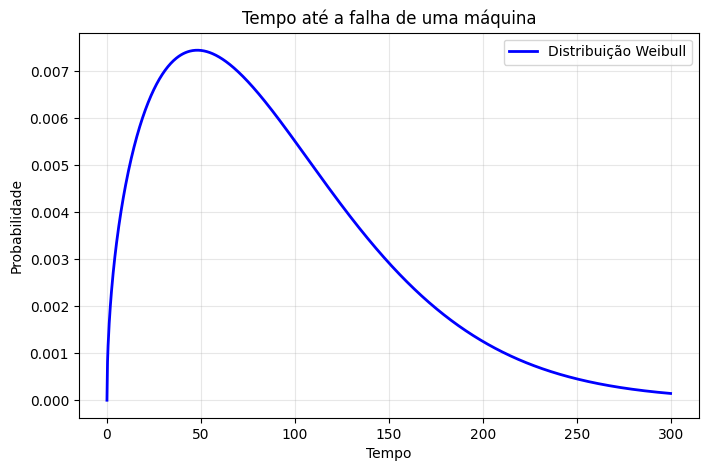

In [3]:
# definição dos parâmetros da distribuição Weibull
shape = 1.5  # Parâmetro de forma (define o formato da curva)
scale = 100  # Parâmetro de escala (define o intervalo de tempo médio)

# geração de valores no intervalo de tempo desejado
x = np.linspace(0, 300, 1000)  # De 0 a 300 em 1000 pontos
pdf = weibull_min.pdf(x, shape, scale=scale)  # Função densidade de probabilidade

# gráfico da distribuição
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label="Distribuição Weibull", color='blue', linewidth=2)
plt.title("Tempo até a falha de uma máquina")
plt.xlabel("Tempo")
plt.ylabel("Probabilidade")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


O gráfico da distribuição Weibull apresentado mostra a função densidade de probabilidade (PDF), que representa a probabilidade relativa de falha em diferentes intervalos de tempo.

No início (tempo próximo de zero), a probabilidade de falha é muito baixa, pois o sistema ou máquina ainda está "novo".

À medida que o tempo avança, a probabilidade de falha aumenta rapidamente até atingir um pico, representando o intervalo de tempo onde as falhas são mais prováveis.

Após o pico, a densidade de probabilidade começa a diminuir, indicando que é menos provável que falhas ocorram em tempos muito longos, pois as falhas já teriam ocorrido em sua maioria.

### **Previsão de Demanda**

**Contexto:** Empresas precisam prever demandas para ajustar estoques. A distribuição Poisson é excelente para modelar eventos que ocorrem em períodos discretos, como pedidos diários.

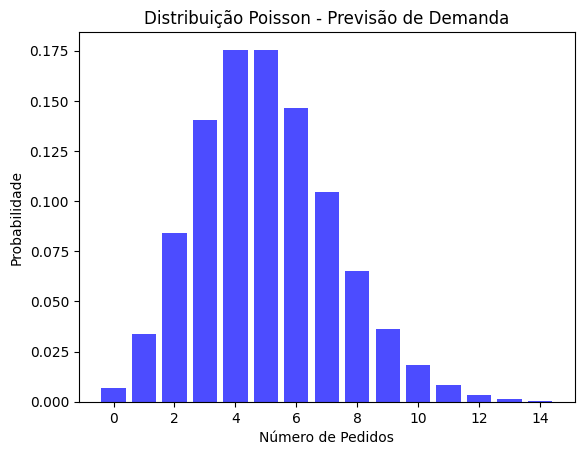

In [4]:
from scipy.stats import poisson

# Lambda é a taxa média de pedidos por período
lambda_ = 5  # média de 5 pedidos por dia
x = np.arange(0, 15)
pmf = poisson.pmf(x, lambda_)

plt.bar(x, pmf, alpha=0.7, color='blue')
plt.title("Distribuição Poisson - Previsão de Demanda")
plt.xlabel("Número de Pedidos")
plt.ylabel("Probabilidade")
plt.show()

A distribuição Poisson modela a probabilidade de um número específico de pedidos (eventos) ocorrerem em um período fixo.

O gráfico mostra que a distribuição Poisson captura a probabilidade de diferentes números de eventos (pedidos) ocorrerem em um período fixo. E no caso apresentado, o número mais provável de pedidos em um dia é próximo a 5, enquanto números muito menores ou maiores têm probabilidades reduzidas.

### **Análise de Testes A/B**

**Contexto:** Nos testes A/B, é crucial entender as taxas de conversão entre variantes. A distribuição Beta é ideal para modelar essas probabilidades.

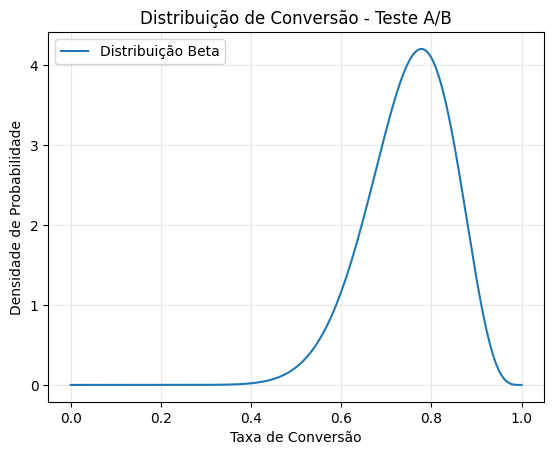

In [6]:
from scipy.stats import beta

# Sucessos e falhas para duas versões
alpha, beta_val = 15, 5  # Sucessos e falhas na versão atual
x = np.linspace(0, 1, 1000)
pdf = beta.pdf(x, alpha, beta_val)

plt.plot(x, pdf, label="Distribuição Beta")
plt.title("Distribuição de Conversão - Teste A/B")
plt.xlabel("Taxa de Conversão")
plt.ylabel("Densidade de Probabilidade")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Utilizamos a distribuição Beta para modelar a taxa de conversão em um teste A/B,  definida com base no número de sucessos (conversões) e falhas em uma variante.

O gráfico foi gerado usando a **distribuição Beta** parametrizada pelos números de sucessos e falhas fornecidos no código, foram definidos 15 sucessos (α) e 5 falhas (β), o que faz a curva se concentrar em valores de conversão próximos a 0,75.

Ele mostra que a distribuição Beta captura a probabilidade de diferentes taxas de conversão com base nos dados disponíveis, sendo útil para comparar alternativas em um teste A/B.

### **Modelagem de Tempo de Espera**

**Contexto:** O tempo de espera em filas pode ser modelado com distribuições exponenciais, úteis em análises operacionais.

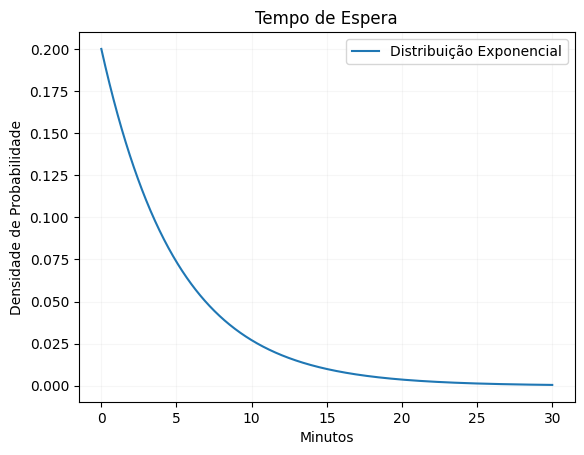

In [10]:
from scipy.stats import expon

# Tempo médio de espera (parâmetro lambda)
lambda_ = 1/5  # 5 minutos em média
x = np.linspace(0, 30, 1000)
pdf = expon.pdf(x, scale=1/lambda_)

plt.plot(x, pdf, label="Distribuição Exponencial")
plt.title("Tempo de Espera")
plt.xlabel("Minutos")
plt.ylabel("Densidade de Probabilidade")
plt.grid(alpha=0.1)
plt.legend()
plt.show()


O gráfico indica que tempos curtos (próximos de 0 minutos) têm maior probabilidade, enquanto tempos longos têm probabilidade muito baixa. Isso é consistente com situações reais, como filas em um call center ou sistema de atendimento, onde a maior parte dos atendimentos ocorre em tempos curtos, mas há uma "cauda longa" de eventos com tempos mais elevados.

Isso reflete o comportamento esperado da distribuição Exponencial. Ele mostra como essa distribuição é adequada para modelar tempos de espera em sistemas onde eventos ocorrem de forma aleatória, mas com uma taxa média fixa.

### **Detecção de Anomalias**

**Contexto:** Identificar anomalias em transações financeiras ou comportamentos de sistemas é uma aplicação clássica de distribuições normais.

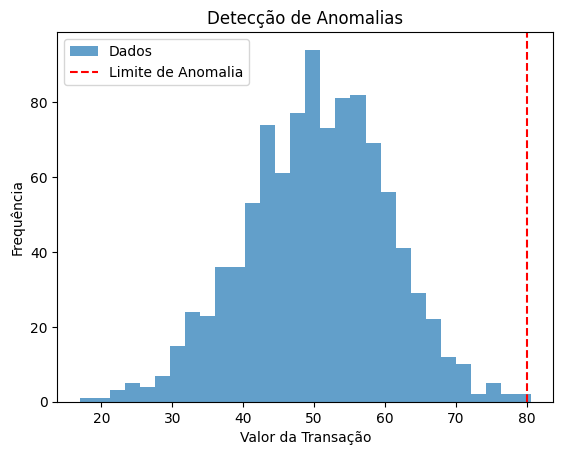

In [11]:
# Dados simulados
data = np.random.normal(loc=50, scale=10, size=1000)
threshold = 80  # Valor limite para anomalias

plt.hist(data, bins=30, alpha=0.7, label="Dados")
plt.axvline(threshold, color='red', linestyle='--', label="Limite de Anomalia")
plt.title("Detecção de Anomalias")
plt.xlabel("Valor da Transação")
plt.ylabel("Frequência")
plt.legend()
plt.show()

O gráfico demonstra como a distribuição normal pode ser usada para identificar anomalias em dados, com base em um limite superior pré-definido. Essa técnica é amplamente usada em detecção de fraudes, monitoramento de sistemas e análise de qualidade.

Podemos observar que a maioria das transações está dentro do intervalo esperado, em torno da média de 50, o que é consistente com uma distribuição normal. As transações acima do limite de 80 são visualmente destacadas como eventos raros e, portanto, potenciais anomalias.

### **Segmentação de Clientes**

**Contexto:** A segmentação probabilística ajuda a agrupar clientes com base em características semelhantes. A distribuição Multinomial é ideal para esse propósito.

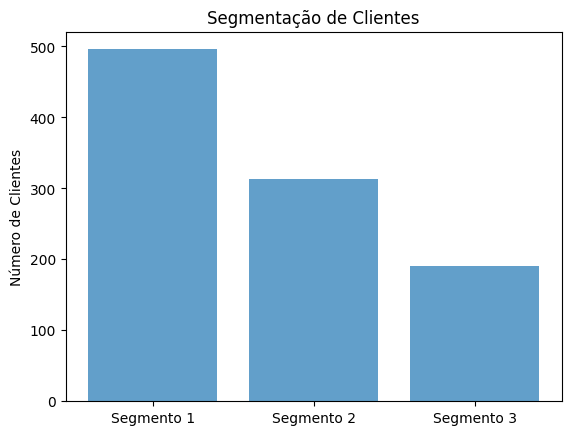

In [12]:
from numpy.random import multinomial

# Probabilidades para 3 segmentos
probabilities = [0.5, 0.3, 0.2]
n_customers = 1000
segments = multinomial(n_customers, probabilities)

labels = ["Segmento 1", "Segmento 2", "Segmento 3"]
plt.bar(labels, segments, alpha=0.7)
plt.title("Segmentação de Clientes")
plt.ylabel("Número de Clientes")
plt.show()


Foi utilizada a distribuição Multinomial para alocar 1000 clientes em três segmentos com probabilidades:

- Segmento 1: 50%
- Segmento 2: 30%
- Segmento 3: 20%

O número de clientes em cada segmento foi determinado com base nessas probabilidades.

O gráfico mostra que aproximadamente metade dos clientes foi alocada ao Segmento 1 (probabilidade de 50%), enquanto os Segmentos 2 e 3 receberam 30% e 20% dos clientes, respectivamente.

Ele demonstra como a distribuição Multinomial pode ser usada para simular a segmentação de clientes em grupos com tamanhos proporcionais às probabilidades fornecidas. Essa técnica é útil em análises de mercado e em estratégias de marketing direcionado.

### **Simulações Monte Carlo**

**Contexto:** Simulações Monte Carlo são amplamente usadas para prever cenários futuros em ambientes incertos, como custos logísticos.

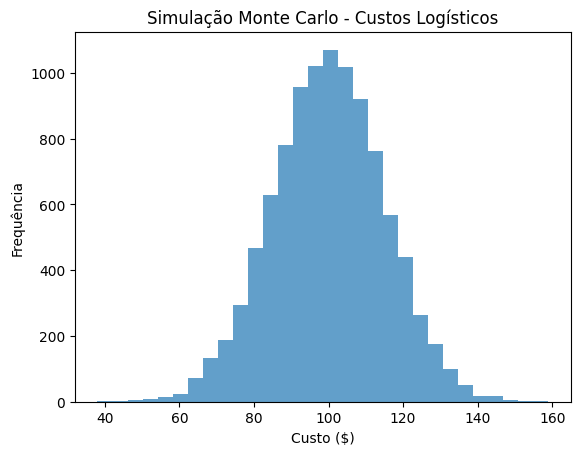

In [13]:
n_simulations = 10000
costs = np.random.normal(loc=100, scale=15, size=n_simulations)

plt.hist(costs, bins=30, alpha=0.7)
plt.title("Simulação Monte Carlo - Custos Logísticos")
plt.xlabel("Custo ($)")
plt.ylabel("Frequência")
plt.show()


A distribuição normal foi utilizada para simular custos logísticos, com média de $100 e desvio padrão de $15. Foram realizadas 10.000 simulações para obter uma distribuição dos custos.

O gráfico mostra que a maior parte dos custos está concentrada em torno da média ($100), com valores mais extremos ocorrendo com menor frequência, isso condiz com a natureza da distribuição normal, onde a maioria dos valores está próxima da média, e há uma "cauda" simétrica para valores mais baixos e mais altos.

Ele demonstra como simulações Monte Carlo podem ser usadas para modelar custos logísticos em cenários incertos, fornecendo uma distribuição esperada de valores. Essa abordagem é útil para planejamento e análise de riscos.

### **Previsão de Eventos Raros**

**Contexto:** Quando eventos são incomuns, como acidentes de trânsito ou falhas em sistemas, a distribuição Poisson pode ajudar a modelar e prever a frequência com precisão.

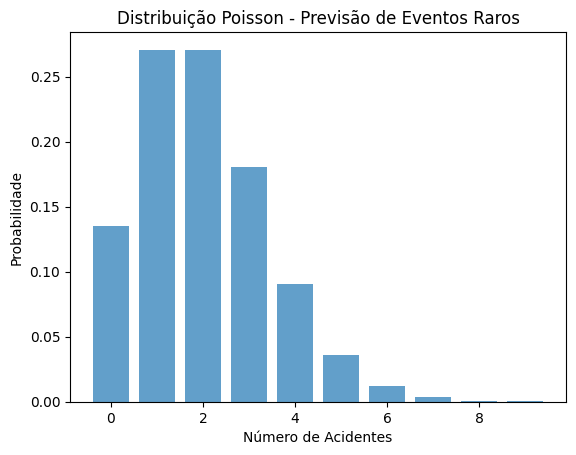

In [14]:
from scipy.stats import poisson

# Média de acidentes por mês
lambda_ = 2  # 2 acidentes em média por mês
x = np.arange(0, 10)
pmf = poisson.pmf(x, lambda_)

plt.bar(x, pmf, alpha=0.7)
plt.title("Distribuição Poisson - Previsão de Eventos Raros")
plt.xlabel("Número de Acidentes")
plt.ylabel("Probabilidade")
plt.show()


A distribuição Poisson foi utilizada para modelar o número de acidentes em um período, assumindo uma média (λ) de 2 acidentes por período.

O gráfico de barras foi gerado para visualizar a probabilidade de cada quantidade específica de acidentes (0, 1, 2, ..., 8).

O gráfico reflete corretamente que a probabilidade é maior para valores próximos à média (x=2), e eventos com muitos acidentes (x>5) ou nenhum acidente (x=0) têm probabilidades menores. Esse comportamento é característico da distribuição Poisson, que é ideal para modelar eventos raros em períodos fixos.

Aqui observamos como a distribuição Poisson pode ser utilizada para prever a probabilidade de eventos raros, como acidentes em um cruzamento, com base em uma taxa média. Essa abordagem é amplamente usada em análises de risco, manutenção preditiva e planejamento urbano.

### **Precificação de Seguros**

**Contexto:** No setor de seguros, modelar os valores de sinistros é crucial para determinar prêmios justos. A distribuição Log-normal é útil quando os valores têm grande assimetria.

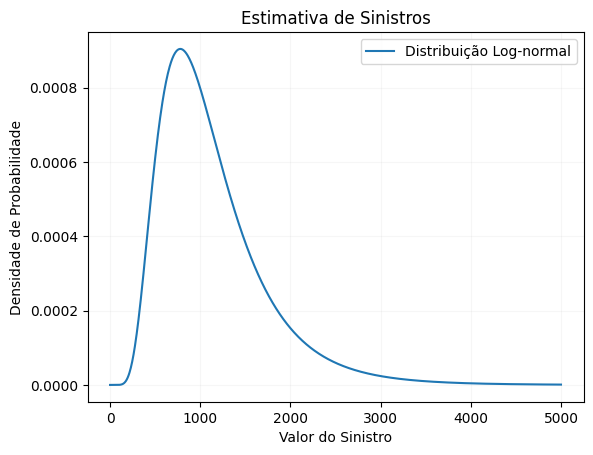

In [16]:
from scipy.stats import lognorm

# Parâmetros da distribuição
sigma, scale = 0.5, 1000  # Desvio padrão e escala
x = np.linspace(0, 5000, 1000)
pdf = lognorm.pdf(x, sigma, scale=scale)

plt.plot(x, pdf, label="Distribuição Log-normal")
plt.title("Estimativa de Sinistros")
plt.xlabel("Valor do Sinistro")
plt.ylabel("Densidade de Probabilidade")
plt.grid(alpha=0.1)
plt.legend()
plt.show()

A distribuição Log-normal foi parametrizada com:

- Desvio padrão (σ) = 0,5
- Escala (μ) = 1000

O gráfico foi gerado para visualizar a densidade de probabilidade em um intervalo de 0 a 5000.

O gráfico mostra que a maioria dos sinistros ocorre em valores mais baixos (em torno de 1000), enquanto valores mais altos, como 4000 ou 5000, são muito menos prováveis.

A assimetria da distribuição é consistente com a natureza de eventos financeiros e econômicos, onde a maioria dos valores está concentrada em uma faixa baixa, mas há a possibilidade de eventos extremos.

Ele demonstra como a distribuição Log-normal é adequada para modelar sinistros, que geralmente apresentam valores baixos ou moderados, mas têm uma probabilidade significativa de eventos extremos. Essa abordagem é amplamente usada em análises de risco financeiro e seguros.

### **Análise de Séries Temporais**

**Contexto:** As séries temporais frequentemente incluem incertezas que podem ser modeladas usando distribuições normais. Isso permite prever valores futuros com intervalos de confiança robustos.

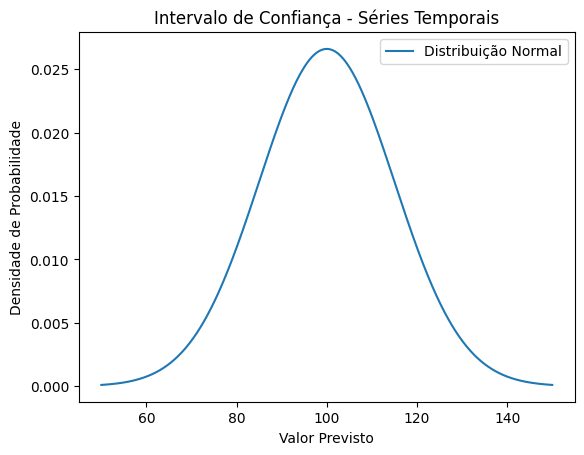

In [17]:
from scipy.stats import norm

# Parâmetros da distribuição
mu, sigma = 100, 15  # média e desvio padrão
x = np.linspace(50, 150, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, label="Distribuição Normal")
plt.title("Intervalo de Confiança - Séries Temporais")
plt.xlabel("Valor Previsto")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.show()
